In [1]:
from utilities import PlotComp
from GEF import GEF
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd
import numpy as np
import os

In [2]:
omega = 3.814203717684728e-05

In [16]:
def GetBand(x):
    x = np.array(x)
    xmax = np.array([max(x[:,i]) for i in range(x.shape[1])])
    xmin = np.array([min(x[:,i]) for i in range(x.shape[1])])
    xmid = x[int((x.shape[0]-1)/2),:]
    xelc = x[0,:]
    xmag = x[-1,:]
    return xmax, xmin, xmid, xelc, xmag

In [17]:
# assign directory
directory = 'Out'

file = "GEF_Beta25.0_SEmix.dat"
file = os.path.join(directory, file)
input_df = pd.read_table(file, sep=",")
data = dict(zip(input_df.columns[1:],input_df.values[1:,1:].T))
N = data["N"]
E1 = 0.5*data["E"]*omega**4
B1 = 0.5*data["B"]*omega**4
G1 = 0.5*data["G"]*omega**4
rhoChi1 = data["rhoChi"]*omega**4

Nmax = max(N)
Es = []
Bs = []
Gs = []
chis = []
rhos = []

directory = 'OutSE'
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        input_df = pd.read_table(f, sep=",")
        data = dict(zip(input_df.columns[1:],input_df.values[1:,1:].T))
        Ntmp = data["N"]
        Nmax = min(max(Ntmp), Nmax)
        Es.append(0.5*omega**4*CubicSpline(Ntmp, data["E"])(N))
        Bs.append(0.5*omega**4*CubicSpline(Ntmp, data["B"])(N))
        Gs.append(0.5*omega**4*CubicSpline(Ntmp, abs(data["G"]))(N))
        chis.append(omega**4*CubicSpline(Ntmp, data["rhoChi"])(N))
        rhos.append(3*omega**2*CubicSpline(Ntmp, (data["H"])**2)(N))

/tmp/ipykernel_174227/4235369249.py:7: RuntimeWarning: invalid value encountered in sqrt
  thetamax, thetamin, thetamid, thetaelc, thetamag = GetBand(list(np.array(Gs)/np.sqrt(np.array(Es)*np.array(Bs))))


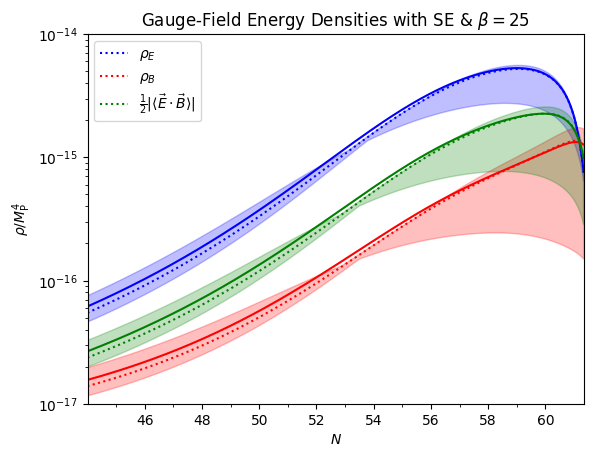

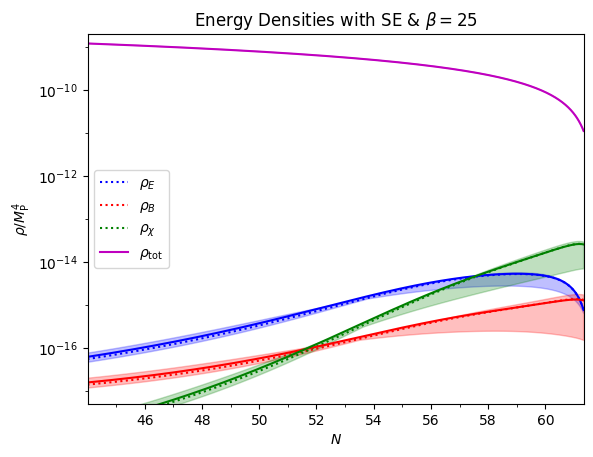

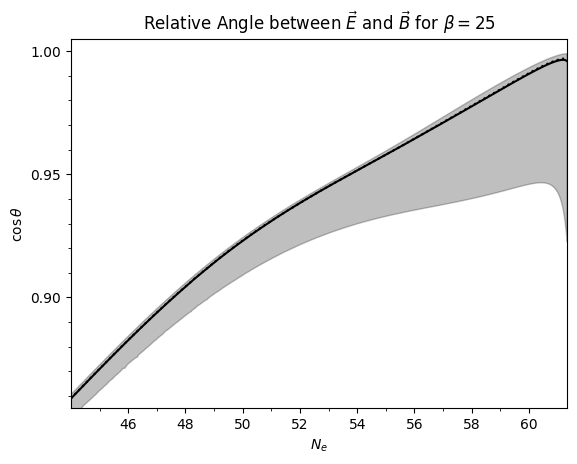

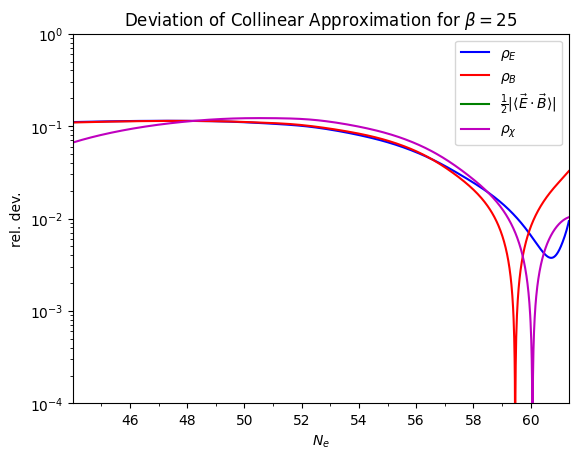

In [18]:
rhoEmax, rhoEmin, rhoEmid, rhoEelc, rhoEmag = GetBand(Es)
rhoBmax, rhoBmin, rhoBmid, rhoBelc, rhoBmag = GetBand(Bs)
rhoGmax, rhoGmin, rhoGmid, rhoGelc, rhoGmag = GetBand(Gs)
rhoCmax, rhoCmin, rhoCmid, rhoCelc, rhoCmag = GetBand(chis)
rhoTmax, rhoTmin, rhoTmid, rhoTelc, rhoTmag = GetBand(rhos)

thetamax, thetamin, thetamid, thetaelc, thetamag = GetBand(list(np.array(Gs)/np.sqrt(np.array(Es)*np.array(Bs))))

xticks = np.arange(46, 61, 2)
xticksmin = np.arange(45, 60, 2)
yticks = 10**(-1.*np.arange(14, 18, 1))

plt.title("Gauge-Field Energy Densities with SE & " +  r"$\beta=25$")
plt.plot(N, rhoEmid, "b:", label=r"$\rho_E$")
plt.plot(N, rhoBmid, "r:", label=r"$\rho_B$")
plt.plot(N, rhoGmid, "g:", label=r"$\frac{1}{2}|\langle\vec{E}\cdot\vec{B}\rangle|$")
plt.plot(N, E1, "b-")
plt.plot(N, B1, "r-")
plt.plot(N, abs(G1), "g-")
"""plt.plot(N, rhoEelc, "b:")
plt.plot(N, rhoBelc, "r:")
plt.plot(N, rhoGelc, "g:")
plt.plot(N, rhoEmag, "b-")
plt.plot(N, rhoBmag, "r-")
plt.plot(N, rhoGmag, "g-")"""
plt.fill_between(N, rhoEmax, rhoEmin, alpha=0.25, color="b", edgecolor="b")
plt.fill_between(N, rhoBmax, rhoBmin, alpha=0.25, color="r", edgecolor="r")
plt.fill_between(N, rhoGmax, rhoGmin, alpha=0.25, color="g", edgecolor="g")
plt.legend(loc=0)
plt.yscale("log")
plt.ylabel(r"$\rho/M_\mathrm{P}^4$")
plt.xlabel(r"$N$")
plt.ylim(1e-17, 1e-14)
plt.xlim(44, Nmax)
plt.xticks(xticks)
plt.xticks(xticksmin, minor=True)
plt.yticks(yticks)
plt.savefig("SE_Beta25_GaugeFields_CollinearVSfull_Old.png")
plt.show()


#xticks = np.arange(46, 61, 2)
#xticksmin = np.arange(45, 62, 2)
yticks = 10**(-1.*np.arange(10, 18, 2))
yticksmin = 10**(-1.*np.arange(9, 19, 2))

plt.title("Energy Densities with SE & " +  r"$\beta=25$")
plt.plot(N, rhoEmid, "b:", label=r"$\rho_E$")
plt.plot(N, rhoBmid, "r:", label=r"$\rho_B$")
plt.plot(N, rhoCmid, "g:", label=r"$\rho_\chi$")
plt.plot(N, rhoTmid, "m-", label=r"$\rho_{\mathrm{tot}}$")
plt.plot(N, E1, "b-")
plt.plot(N, B1, "r-")
plt.plot(N, rhoChi1, "g-")
plt.fill_between(N, rhoEmax, rhoEmin, alpha=0.25, color="b", edgecolor="b")
plt.fill_between(N, rhoBmax, rhoBmin, alpha=0.25, color="r", edgecolor="r")
plt.fill_between(N, rhoCmax, rhoCmin, alpha=0.25, color="g", edgecolor="g")
plt.fill_between(N, rhoTmax, rhoTmin, alpha=0.25, color="m", edgecolor="m")
plt.legend(loc=0)
plt.yscale("log")
plt.ylabel(r"$\rho/M_\mathrm{P}^4$")
plt.xlabel(r"$N$")
#plt.vlines(61., 1e-20, 1e-8, "k")
plt.ylim(0.5e-17, 2e-9)
plt.xlim(44., Nmax)
plt.xticks(xticks)
plt.xticks(xticksmin, minor=True)
plt.yticks(yticks)
plt.yticks(yticksmin, minor=True, visible=False)
plt.savefig("SE_Beta25_EnergyDensities_CollinearVSfull_Old.png")
plt.show()

plt.title("Relative Angle between " + r"$\vec{E}$ and $\vec{B}$ for $\beta=25$")
yticks = 0.01*np.arange(90, 105, 5)
yticksmin = 0.01*np.arange(86, 101, 1)
plt.fill_between(N, thetamax, thetamin, alpha=0.25, color="k", edgecolor="k")
plt.plot(N, thetamid, "k:", label=r"$\rho_E$")
plt.plot(N, abs(G1)/np.sqrt(E1*B1), "k-")
plt.ylim(0.855, 1.005)
plt.xlim(44., Nmax)
plt.xticks(xticks)
plt.xticks(xticksmin, minor=True)
plt.yticks(yticks)
plt.yticks(yticksmin, labels=None, minor=True)
plt.ylabel(r"$\cos \theta$")
plt.xlabel(r"$N_e$")
plt.savefig("SE_Beta25_Angle_CollinearVSfull_Old.png")
plt.show()

plt.title(r"Deviation of Collinear Approximation for $\beta=25$")
#yticks = 0.02*np.arange(0, 6, 1)
#yticksmin = 0.01*np.arange(1, 10, 2)
plt.plot(N, abs((E1-rhoEmid)/E1), "b-", label=r"$\rho_E$")
plt.plot(N, abs((B1-rhoBmid)/B1), "r-", label=r"$\rho_B$")
plt.plot(N, abs((G1-rhoGmid)/G1), "g-", label=r"$\frac{1}{2}|\langle\vec{E}\cdot\vec{B}\rangle|$")
plt.plot(N, abs((rhoChi1-rhoCmid)/rhoChi1), "m-", label=r"$\rho_\chi$")
plt.ylim(1e-4, 1)
plt.xlim(44., Nmax)
plt.xticks(xticks)
plt.xticks(xticksmin, minor=True)
#plt.yticks(yticks)
#plt.yticks(yticksmin, labels=None, minor=True)
plt.ylabel("rel. dev.")
plt.xlabel(r"$N_e$")
plt.yscale("log")
plt.legend(loc=0)
plt.savefig("SE_Beta25_CollApprox_CollinearVSfull_Old.png")
plt.show()

In [2]:
alpha = 0.
Mpl = 1.
beta = 25.
M = 6e-6*Mpl
phi0 = 15.55*Mpl
dphidt0 = -np.sqrt(2/3)*M*Mpl
ini = {"phi":phi0, "dphi":dphidt0, "delta":1.0, "rhoChi":0.0}
SE = "mix"
ntr = 115
G = GEF(alpha, beta, Mpl, ini, M, ntr, SE, AltDamp=False, approx=True)
G.RunGEF(t1=120.)

Elapsed time: 78.7481 seconds


In [13]:
N4 = G.vals["N"]
xi4 = G.vals["xi"]
#xieff4 = G.vals["xieff"]
#delta4 = G.vals["delta"]
H4 = G.vals["H"]
rhoChi1 = G.vals["rhoChi"]
E4 = G.vals["E"]
B4 = G.vals["B"]
G4 = G.vals["G"]

file2 = "/home/users/rfreiher/Documents/Axion_Inflation/GEF/Out/GEF_Beta25.0_SEmix.dat"
input_df = pd.read_table(file2, sep=",")
data = input_df.values
print(data.shape)

N1 = data[1:,6]
xi1 = data[1:,-2]
H1 = data[1:,-5]
E1 = data[1:,-8]
B1 = data[1:,-7]
G1 = data[1:,-6]
rhoChi1 = data[1:,4]


(6669, 17)


/home/users/rfreiher/Documents/Axion_Inflation/GEF/utilities.py:12: RuntimeWarning: divide by zero encountered in divide
  ax2.plot(Nref, abs(spl/Yref-1), col)


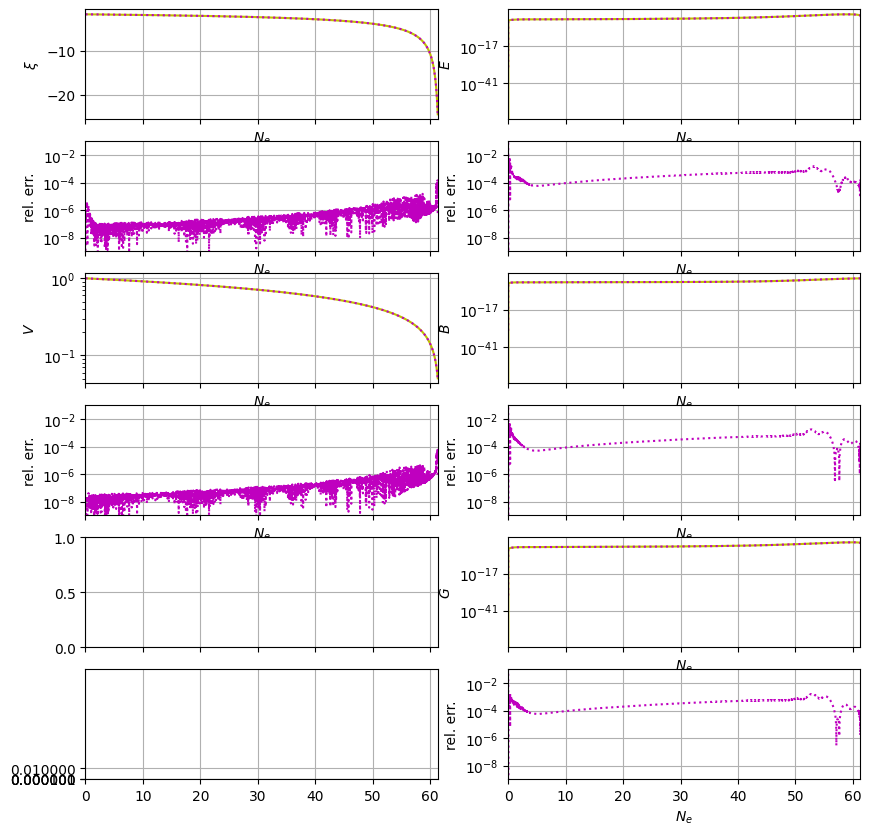

In [4]:
fig, ax = plt.subplots(6,2, figsize=(10,10), sharex=True)

ax[0,0].plot(N4, xi4, "y-")
PlotComp(ax[0,0], ax[1,0], N1, xi1, N4, xi4, col="m:")
#ax[0,0].set_yscale("log")
ax[0,0].set_ylabel(r"$\xi$")

ax[2,0].plot(N4, H4, "y-")
PlotComp(ax[2,0], ax[3,0], N1, H1, N4, H4, col="m:")
ax[2,0].set_ylabel(r"$V$")
ax[2,0].set_yscale("log")

"""ax[4,0].plot(N4, rhoChi4, "y-", label=str(ntr[-1]))
PlotComp(ax[4,0], ax[5,0], N1, rhoChi1, N4, rhoChi4, col="m:", label=str(ntr[0]))
ax[4,0].set_ylabel(r"$\rho_\chi$")
ax[4,0].set_yscale("log")"""

ax[0,1].plot(N4, E4, "y-")
PlotComp(ax[0,1], ax[1,1], N1, E1, N4, E4, col="m:")
ax[0,1].set_ylabel(r"$E$")
ax[0,1].set_yscale("log")

ax[2,1].plot(N4, B4, "y-")
PlotComp(ax[2,1], ax[3,1], N1, B1, N4, B4, col="m:")
ax[2,1].set_ylabel(r"$B$")
ax[2,1].set_yscale("log")

ax[4,1].plot(N4, abs(G4), "y-")
PlotComp(ax[4,1], ax[5,1], N1, abs(G1), N4, abs(G4), col="m:")
ax[4,1].set_ylabel(r"$G$")
ax[4,1].set_yscale("log")

#lines_labels = [ax[0,0].get_legend_handles_labels()]
#lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
#fig.legend(lines, labels)

a = np.arange(2, 9, 2)
for i in range(3):
    ax[2*i+1,0].set_ylim(10.**(-9), 10**(-1))
    ax[2*i+1,0].set_yticks(10.**(-a))
    
    ax[2*i+1,1].set_ylim(10.**(-9), 10**(-1))
    ax[2*i+1,1].set_yticks(10.**(-a))
    
#ax[0,0].set_ylim(-0.5,10)
#ax[2,0].set_ylim(-4.5e-6,1e-6)
#ax[4,0].set_ylim(-20,20)
#ax[4,0].set_ylim(1e7, 2e18)

"""ax[0,1].set_ylim(1e-16, 1e-13)
ax[2,1].set_ylim(1e-16, 2e-14)
ax[4,1].set_ylim(1e-16, 2e-14)
ax[4,0].set_ylim(1e-16, 1e-13)
"""
for ax in fig.axes:
    ax.grid(True)
    ax.set_xlim(0, max([*N1, *N4]))
plt.show()

In [ ]:
def Whittaker_PostFermionEntry(x):
        xieff = x.vals["xieff"]
        xi = x.vals["xi"]
        sB = xieff-xi
        sE = x.vals["s"]
        z = 2j*x.zferm
        k = x.vals["kh"]
        
        W = np.array([whitw(-1j*xi, 1/2, z), whitw(1j*xi, 1/2, z)])
        W1 = np.array([whitw(1-1j*xi, 1/2, z), whitw(1+1j*xi, 1/2, z)])
                      
        Mf = np.array([whitm(-1j*xieff, 1/2+sE, z), whitm(1j*xieff, 1/2+sE, z)])
        Mf1 = np.array([whitm(1-1j*xieff, 1/2+sE, z), whitm(1+1j*xieff, 1/2+sE, z)])
                    
        Wf = np.array([whitw(-1j*xieff, 1/2+sE, z), whitw(1j*xieff, 1/2+sE, z)])
        Wf1 = np.array([whitw(1-1j*xieff, 1/2+sE, z), whitw(1+1j*xieff, 1/2+sE, z)])
        
        lam = np.array([1, -1])
        
        C = np.exp(np.pi*xi*lam)/(2*k)
        B = (W*(Wf1/Wf-1j*lam*sB-sE)-W1)/((1.+sE-1j*lam*xieff)*Mf1+Wf1/Wf*Mf)
        A = (W - B*Mf)/Wf
        
        #print("A:", A, "B:", B)
        
        r = (abs(xieff) + np.sqrt(xieff**2 + sE**2 + sE))
        
        Mr = np.array([whitm(-1j*xieff, 1/2+sE, -2j*r), whitm(1j*xieff, 1/2+sE, -2j*r)])
        Mr1 = np.array([whitm(1-1j*xieff, 1/2+sE, -2j*r), whitm(1+1j*xieff, 1/2+sE, -2j*r)])
                    
        Wr = np.array([whitw(-1j*xieff, 1/2+sE, -2j*r), whitw(1j*xieff, 1/2+sE, -2j*r)])
        Wr1 = np.array([whitw(1-1j*xieff, 1/2+sE, -2j*r), whitw(1+1j*xieff, 1/2+sE, -2j*r)])
        
        Akplus = A[0]*Wr[0] + B[0]*Mr[0]
        Akminus = A[1]*Wr[1] + B[1]*Mr[1]
        Dkplus = ((1j*(r-xieff) - sE)*Akplus + A[0]*Wr1[0] - B[0]*(1+sE-1j*xieff)*Mr1[0])/r
        Dkminus = ((1j*(r+xieff) - sE)*Akminus + A[1]*Wr1[1] - B[1]*(1+sE+1j*xieff)*Mr1[1])/r
        
        Fterm = np.zeros((3, 2))
        Fterm[0,0] = C[0]*abs(Dkplus)**2
        Fterm[1,0] = C[0]*abs(Akplus)**2
        Fterm[2,0] = C[0]*(Dkplus*Akplus.conjugate()).real
        
        Fterm[0,1] = C[1]*abs(Dkminus)**2
        Fterm[1,1] = C[1]*abs(Akminus)**2
        Fterm[2,1] = C[1]*(Dkminus*Akminus.conjugate()).real
        
        return Fterm